In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from timeit import default_timer as timer

In [2]:
from utils.maze_utilities import *
from utils.cost_functions import *
from utils.plot_utilities import *
from utils.dynamic_programming import *
from utils.config import Config as c

In [3]:
# Constants
c.display()

U: None
delta: 1e-07
gamma: 0.9
maze: None
n_cols: None
n_rows: None
p: 0.1
valid_states: ['0', 'S', 'T', 'G']
vmax: 10
vmin: -10


[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '0' '0' '0' '0' '0' '1' '0' '0' '1']
 ['1' '0' '0' '1' '0' '0' '0' '0' '0' '1']
 ['1' 'T' '1' 'G' '1' '0' '1' '0' 'S' '1']
 ['1' '0' '0' '0' '0' '0' '1' '0' '0' '1']
 ['1' '0' '0' '1' '0' '1' '1' 'T' '1' '1']
 ['1' '0' '0' '0' '0' '0' '0' '0' 'G' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
Running all algorithms for experiments for g_1.
Value Iteration
Policy Iteration
Optimistic Policy Iteration


Running all algorithms for experiments for g_2.
Value Iteration
Policy Iteration
Optimistic Policy Iteration


Are all policies equal for all cost functions and algorithms?
True


Plotting the Value Functions


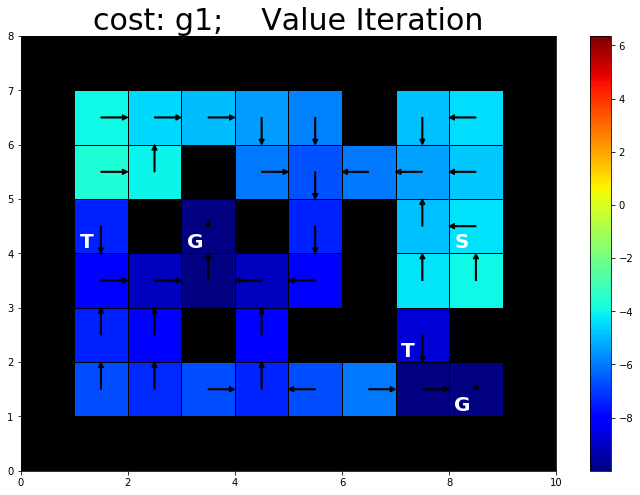

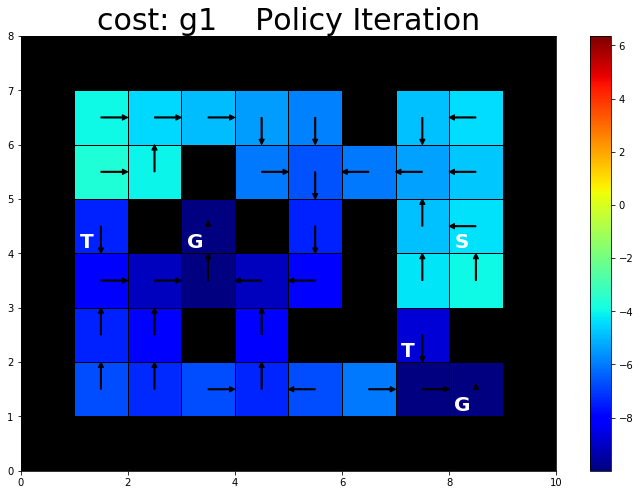

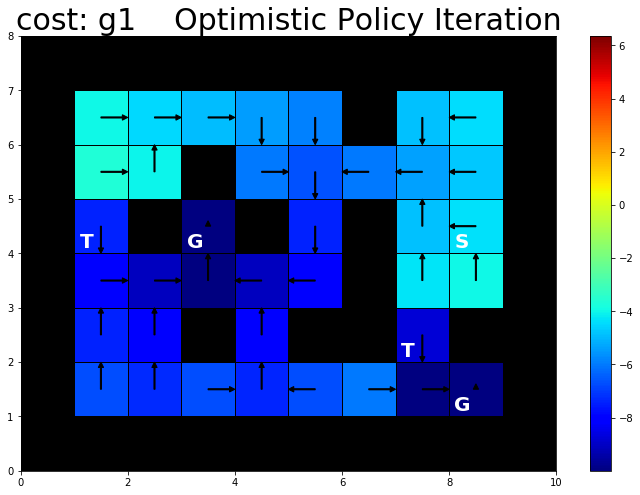

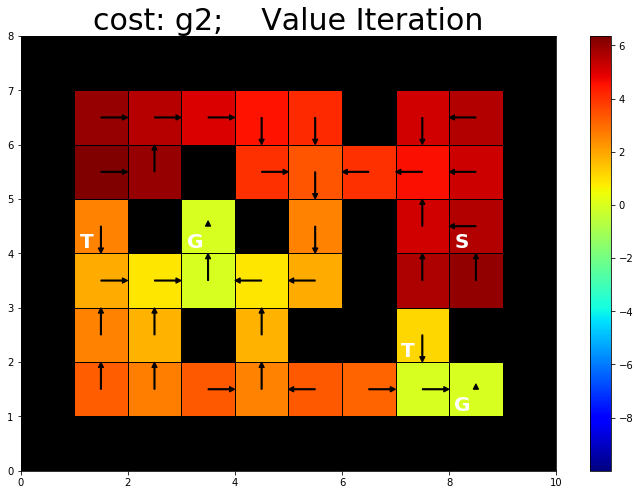

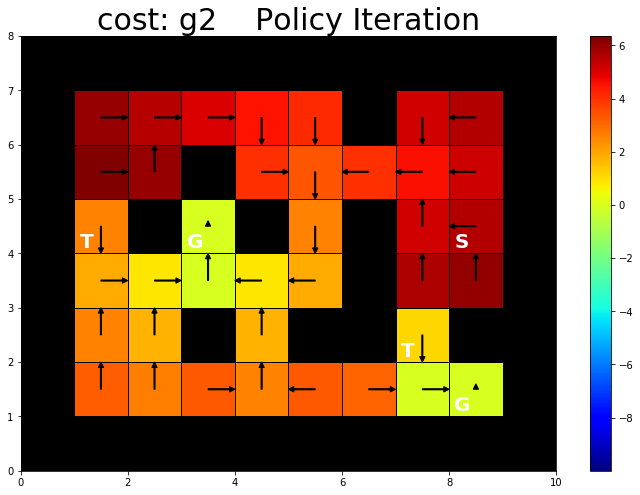

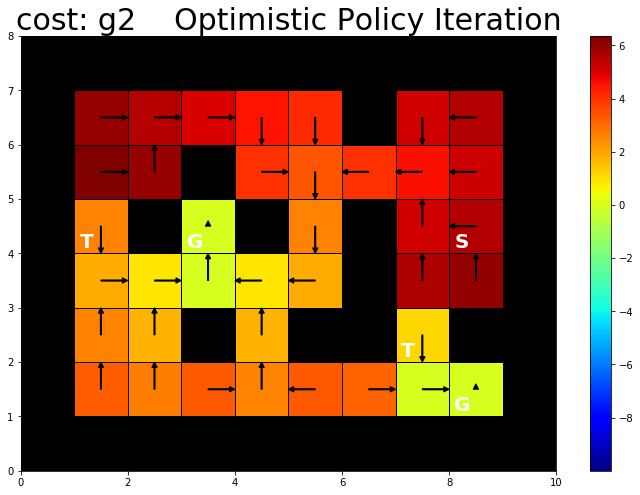

In [4]:
# open the maze file
c.maze = readmaze("maze.txt")
c.n_rows,c.n_cols = c.maze.shape 
print(c.maze)
c.U = get_allowed_actions()

# Experiments with several Algorithms

# Value Iteration: Optimize the value function until convergence while following a greedy policy
# Policy Iteration: Alternate between policy improvement and policy evaluation.
# Optimistic Policy Iteration: Policy Iteration but policy evaluation is stopped after 50 steps.

# with both cost functions g_1 and g_2

titles = ["cost: g1;    Value Iteration", "cost: g1    Policy Iteration", "cost: g1    Optimistic Policy Iteration",
          "cost: g2;    Value Iteration", "cost: g2    Policy Iteration", "cost: g2    Optimistic Policy Iteration"]
value_functions = []
policies = []

V_init = np.zeros_like(c.maze, dtype = "float") # initial value function
PI_init = np.zeros_like(c.maze, dtype = "int")  # initial policy

print("Running all algorithms for experiments for g_1.")

print("Value Iteration")
V_vi_g1 = Value_Iteration(V_init, c.gamma, g_1)
PI_vi_g1 = policy_improvement_step(V_vi_g1, c.gamma, g_1, PI_init)
print("Policy Iteration")
PI_pi_g1, V_pi_g1 = Policy_Iteration(V_init, PI_init, c.gamma, g_1)
print("Optimistic Policy Iteration")
PI_opi_g1, V_opi_g1 = Policy_Iteration(V_init, PI_init, c.gamma, g_1, 50)

value_functions += [V_vi_g1, V_pi_g1, V_opi_g1]
policies += [PI_vi_g1, PI_pi_g1, PI_opi_g1]
print("\n")



print("Running all algorithms for experiments for g_2.")

print("Value Iteration")
V_vi_g2 = Value_Iteration(V_init, c.gamma, g_2)
PI_vi_g2 = policy_improvement_step(V_vi_g2, c.gamma, g_2, PI_init)
print("Policy Iteration")
PI_pi_g2, V_pi_g2 = Policy_Iteration(V_init, PI_init, c.gamma ,g_2)
print("Optimistic Policy Iteration")
PI_opi_g2, V_opi_g2 = Policy_Iteration(V_init, PI_init, c.gamma, g_2, 50)

value_functions += [V_vi_g2, V_pi_g2, V_opi_g2]
policies += [PI_vi_g2, PI_pi_g2, PI_opi_g2]
print("\n")

# Confirm that all policies are equal for different algorithms
print("Are all policies equal for all cost functions and algorithms?")
print(np.all(PI_vi_g1==PI_vi_g2) and np.all(PI_vi_g1==PI_pi_g1) and np.all(PI_vi_g1==PI_pi_g2) 
      and np.all(PI_vi_g1==PI_opi_g1) and np.all(PI_vi_g1==PI_opi_g2))
print("\n")

print("Plotting the Value Functions")
c.vmin = np.min(V_vi_g1)
c.vmax = np.max(V_vi_g2)
for i in range(6):
    plot_result(value_functions[i], policies[i], titles[i])

# Hyperparameter Studies

### Discount factor $\gamma$

1. Running Value Iteration for gamma between 0.01 and 0.99


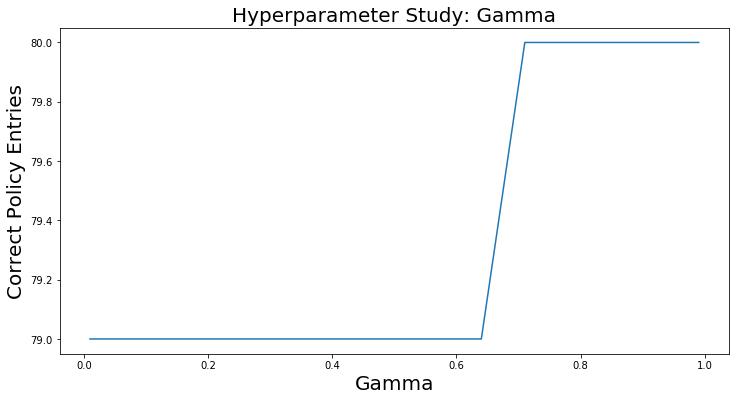

In [6]:
print("1. Running Value Iteration for gamma between 0.01 and 0.99")
V_vi_gamma  = np.zeros((15, c.n_rows, c.n_cols), dtype = "float")
PI_vi_gamma = np.zeros((15, c.n_rows, c.n_cols), dtype = "int")
n_diff = []
gammas = np.linspace(0.99, 0.01, 15)
for i in range(15):
    V_vi_gamma[i] = Value_Iteration(V_init, gammas[i], g_1)
    PI_vi_gamma[i] = policy_improvement_step(V_vi_gamma[i], gammas[i], g_1, PI_init)
    n_diff.append(np.sum(((PI_vi_gamma[i] - PI_vi_gamma[0])*(c.maze != '1'))==0))


plt.figure(figsize=(12,6))
plt.plot(gammas,n_diff)
plt.title("Hyperparameter Study: Gamma",fontsize = 20)
plt.xlabel("Gamma",fontsize = 20)
plt.ylabel("Correct Policy Entries",fontsize = 20)
plt.show()
#plt.savefig("hyperparameter_study_gamma",bbox_inches = 'tight', pad_inches = 0)


### Runtime Comparison

In [7]:
print("2. Timing the three algorithms, 5 runs each")
c.gamma = 0.99
n = 5
times = []
for i in range(n):
    start = timer()
    V = Value_Iteration(V_init, c.gamma, g_1)
    end = timer()
    times.append(end-start)
print(f"Value iteration took \t\t {'{0:.5f}'.format(np.mean(times))} +- {'{0:.5f}'.format(np.std(times))} seconds.")

times = []
for i in range(n):
    start = timer()
    V = Policy_Iteration(V_init, PI_init, c.gamma, g_1)
    end = timer()
    times.append(end-start)
print(f"Policy iteration took \t\t {'{0:.5f}'.format(np.mean(times))} +- {'{0:.5f}'.format(np.std(times))} seconds.")
      
times = []
for i in range(n):
    start = timer()
    V = Policy_Iteration(V_init, PI_init, c.gamma, g_1, 50)
    end = timer()
    times.append(end-start)
print(f"Optimistic policy iteration took {'{0:.5f}'.format(np.mean(times))} +- {'{0:.5f}'.format(np.std(times))} seconds.")

2. Timing the three algorithms, 5 runs each
Value iteration took 		 2.86849 +- 0.09905 seconds.
Policy iteration took 		 0.37461 +- 0.01085 seconds.
Optimistic policy iteration took 0.43030 +- 0.00580 seconds.


### Timing Optimistic Policy Iteration for various numbers of policy evaluation steps

3. Timing Optimistic Policy Iteration for different number of policy evaluation steps


Plotting results


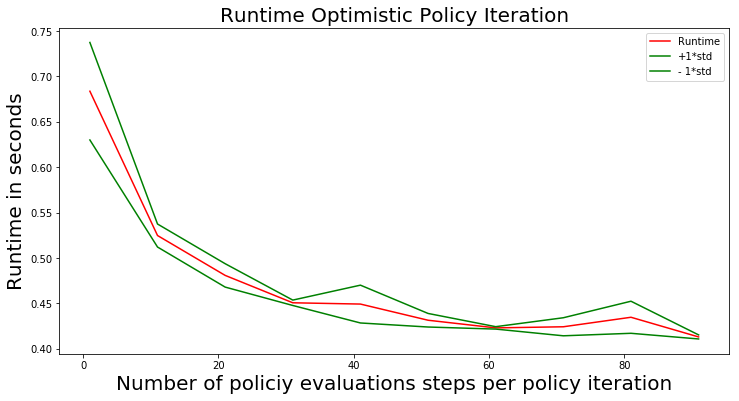

In [7]:
print("3. Timing Optimistic Policy Iteration for different number of policy evaluation steps")
n = 5
m = 100
times = np.zeros((m//10, n))
for i in range(m//10):
    for j in range(n):
        start = timer()
        V = Policy_Iteration(V_init, PI_init, c.gamma, g_1, (i+1)*10)
        end = timer()
        times[i,j]= end-start

time_mean = np.mean(times, axis = -1)
time_std = np.std(times, axis = -1)
print("\n")


print("Plotting results")
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,m,10),time_mean, c = "red")
plt.plot(np.arange(1,m,10),time_mean-time_std, c = "green")
plt.plot(np.arange(1,m,10),time_mean+time_std, c = "green")
plt.title("Runtime Optimistic Policy Iteration",fontsize = 20)
plt.xlabel("Number of policiy evaluations steps per policy iteration",fontsize = 20)
plt.ylabel("Runtime in seconds",fontsize = 20)
plt.legend(["Runtime", "+1*std","- 1*std"])
plt.show()
#plt.savefig("runtime_opi",bbox_inches = 'tight', pad_inches = 0)
print("\n")